# Connecting or Mounting the Drive to the Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Unzipping the Dataset Folder

In [2]:
!unzip /content/drive/My\ Drive/Densenet\ Data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1091).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1092).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1093).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1094).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1095).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1096).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1097).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1098).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1099).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (11).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (110).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1100).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1101).JPG  
  inflating: Tot

# Loading the Data into System

In [3]:
DATASET_DIR='/content/Total/'


# Glob will be useful for retreiving the internal paths where I have to total of 10 classes which is displayed in the output.
from glob import glob
Tomato_Leaf_Diseases = glob('/content/Total/*')
Tomato_Leaf_Diseases

['/content/Total/Tomato_Late_blight',
 '/content/Total/Tomato_Yellow_Leaf_Curl_Virus',
 '/content/Total/Tomato_Septoria_leaf_spot',
 '/content/Total/Tomato_Target_Spot',
 '/content/Total/Tomato_healthy',
 '/content/Total/Tomato_mosaic_virus',
 '/content/Total/Tomato_Bacterial_spot',
 '/content/Total/Tomato_Early_blight',
 '/content/Total/Tomato_Spider_mites',
 '/content/Total/Tomato_Leaf_Mold']

# Loading the Required Packages for the Model

In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import matplotlib.image as mpimg

from tqdm import tqdm
from skimage.io import imread
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications import DenseNet121

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exploratory Data Analysis for easy way of understanding the Dense Net Model


In [5]:
#Creating a list for all the classes in the dataset and storing it in the disease types variable
disease_types = ['Tomato_mosaic_virus',
                 'Tomato_Late_blight',
                 'Tomato_Septoria_leaf_spot',
                 'Tomato_Bacterial_spot',
                 'Tomato_Spider_mites',
                 'Tomato_Yellow_Leaf_Curl_Virus',
                 'Tomato_Leaf_Mold',
                 'Tomato_Target_Spot',
                 'Tomato_healthy',
                 'Tomato_Early_blight']

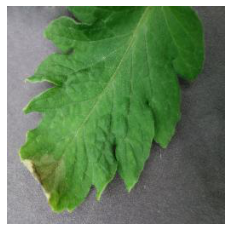

In [6]:
#Reading the Image to present how make sure system understands that the given data is Image Data

img = imread('/content/Total/Tomato_Late_blight/Tomato_Late_blight (1005).JPG')

plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
#Canny edge detection by resizing

default_image_size = tuple((128,128))

def img_to_np(DIR,flatten=True):
    cv_img=mpimg.imread(DIR,0)
    cv_img=cv2.resize(cv_img,default_image_size)
    img = np.uint8(cv_img)
    if(flatten):
        img=img.flatten()
        return img

In [8]:
#Appending all the folders and image files in the dataset for providing the Graphical Representation of Tomato Diseases

TRAIN_DIR="/content/Total/"

index=0
data={}
for FOLDER in os.listdir(TRAIN_DIR):
    for image_dir in os.listdir(TRAIN_DIR+FOLDER):
        if index not in data:
            data[index]=[]
        try: 
            data[index].append(img_to_np(TRAIN_DIR+FOLDER+"/"+image_dir))
        except:
            print("Error to load the image "+TRAIN_DIR+FOLDER+"/"+image_dir)
    index=index+1 

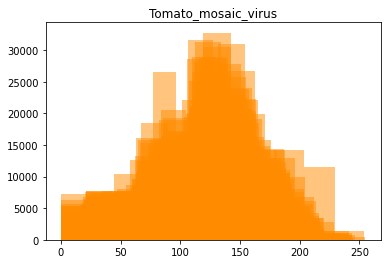

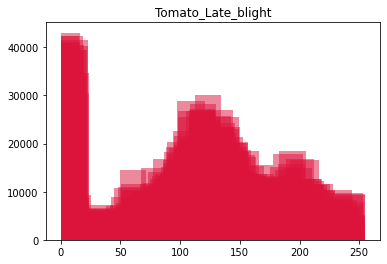

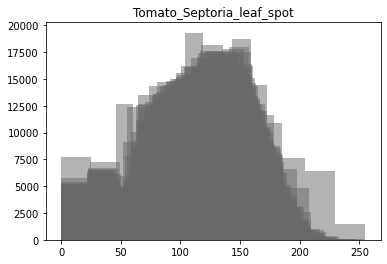

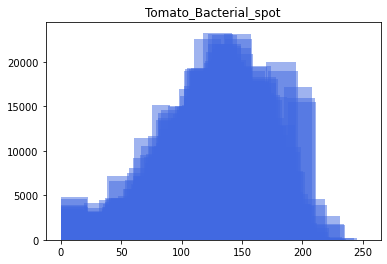

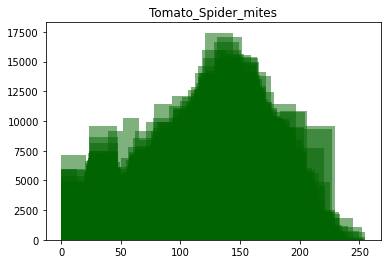

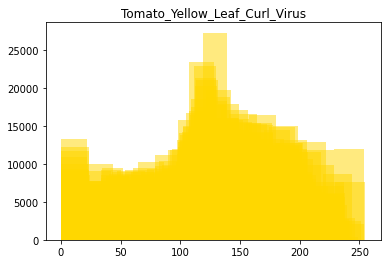

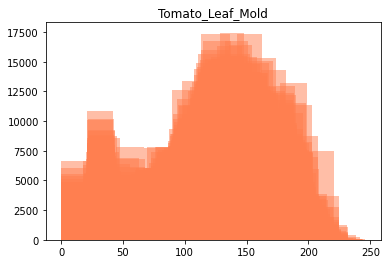

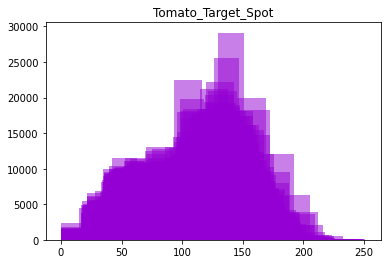

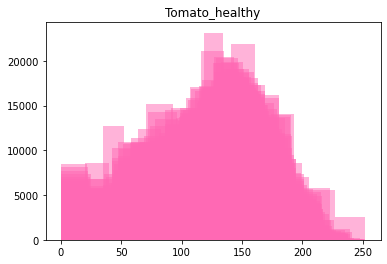

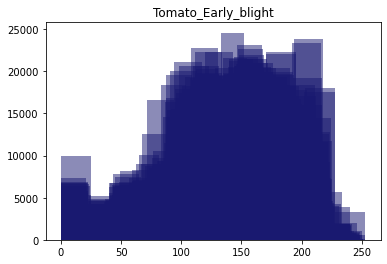

In [ ]:
#Declaring the limit size for the graphs 

CLASS_LIMIT=500 
colors=["darkorange","crimson","dimgray","royalblue","darkgreen","gold","coral","darkviolet","hotpink","midnightblue"]
for index_class in range(len(data)):
    index=0
    for arr in data[index_class]:
        plt.hist(arr,color=colors[index_class],alpha=0.5)
        if(index>CLASS_LIMIT):
            plt.title(disease_types[index_class])
            plt.show()
            break
        index=index+1    

In [9]:
# Creating the List Directory to read all the images in 10 different folders

labels = os.listdir(DATASET_DIR)
print("Number of Labels:", len(labels))

total = 0
for lb in os.scandir(DATASET_DIR):
    print('folder: {} images: {}'.format(lb.name, len(os.listdir(lb))))
    total += len(os.listdir(lb))
print('Total images:', total)

Number of Labels: 10
folder: Tomato_Late_blight images: 1700
folder: Tomato_Yellow_Leaf_Curl_Virus images: 1700
folder: Tomato_Septoria_leaf_spot images: 1700
folder: Tomato_Target_Spot images: 1700
folder: Tomato_healthy images: 1700
folder: Tomato_mosaic_virus images: 1700
folder: Tomato_Bacterial_spot images: 1700
folder: Tomato_Early_blight images: 1700
folder: Tomato_Spider_mites images: 1700
folder: Tomato_Leaf_Mold images: 1700
Total images: 17000


In [10]:
#Printing the tail values which are stored by the system from the dataset

train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(DATASET_DIR, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
        
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train.tail()

,File,DiseaseID,Disease Type
16995,Tomato_Early_blight/Tomato_Early_blight (1428)...,9,Tomato_Early_blight
16996,Tomato_Early_blight/Tomato_Early_blight (203).JPG,9,Tomato_Early_blight
16997,Tomato_Early_blight/Tomato_Early_blight (1621)...,9,Tomato_Early_blight
16998,Tomato_Early_blight/Tomato_Early_blight (681).JPG,9,Tomato_Early_blight
16999,Tomato_Early_blight/Tomato_Early_blight (565).JPG,9,Tomato_Early_blight


In [11]:
# Displaying the head images which are first 5 images reading by the system
# Seed is to randomize the values the value is given as 64 where all the 64 images will be picked by the system randomly out of 10000 images

SEED = 64 
train = train.sample(frac=1, random_state=SEED) 
train.index = np.arange(len(train)) # Reseting the indices values
train.head()

,File,DiseaseID,Disease Type
0,Tomato_Late_blight/Tomato_Late_blight (17).JPG,1,Tomato_Late_blight
1,Tomato_Yellow_Leaf_Curl_Virus/Tomato_Yellow_Le...,5,Tomato_Yellow_Leaf_Curl_Virus
2,Tomato_Early_blight/Tomato_Early_blight (677).JPG,9,Tomato_Early_blight
3,Tomato_mosaic_virus/Tomato_mosaic_virus (701).JPG,0,Tomato_mosaic_virus
4,Tomato_Bacterial_spot/Tomato_Bacterial_spot (8...,3,Tomato_Bacterial_spot


In [12]:
# Provides all the information of the Dataset

train.info

<bound method DataFrame.info of                                                     File  ...                   Disease Type
0         Tomato_Late_blight/Tomato_Late_blight (17).JPG  ...             Tomato_Late_blight
1      Tomato_Yellow_Leaf_Curl_Virus/Tomato_Yellow_Le...  ...  Tomato_Yellow_Leaf_Curl_Virus
2      Tomato_Early_blight/Tomato_Early_blight (677).JPG  ...            Tomato_Early_blight
3      Tomato_mosaic_virus/Tomato_mosaic_virus (701).JPG  ...            Tomato_mosaic_virus
4      Tomato_Bacterial_spot/Tomato_Bacterial_spot (8...  ...          Tomato_Bacterial_spot
...                                                  ...  ...                            ...
16995  Tomato_Spider_mites/Tomato_Spider_mites (1505)...  ...            Tomato_Spider_mites
16996  Tomato_Yellow_Leaf_Curl_Virus/Tomato_Yellow_Le...  ...  Tomato_Yellow_Leaf_Curl_Virus
16997  Tomato_Early_blight/Tomato_Early_blight (162).JPG  ...            Tomato_Early_blight
16998   Tomato_Late_blight/Tomato_Late

In [13]:
# Colum variables stored in the Model

train.columns

Index(['File', 'DiseaseID', 'Disease Type'], dtype='object')

In [14]:
# Value count for images with the ID generated by the system along with the number of images in each ID

train['DiseaseID'].value_counts()

9    1700
8    1700
7    1700
6    1700
5    1700
4    1700
3    1700
2    1700
1    1700
0    1700
Name: DiseaseID, dtype: int64

In [15]:
# Value counts for the model with disease name along with the number of diseases

train['Disease Type'].value_counts()

Tomato_Early_blight              1700
Tomato_Septoria_leaf_spot        1700
Tomato_Yellow_Leaf_Curl_Virus    1700
Tomato_Target_Spot               1700
Tomato_Bacterial_spot            1700
Tomato_Spider_mites              1700
Tomato_healthy                   1700
Tomato_mosaic_virus              1700
Tomato_Leaf_Mold                 1700
Tomato_Late_blight               1700
Name: Disease Type, dtype: int64

In [16]:
# Finding the Data Types for the Files

train.dtypes

File            object
DiseaseID        int64
Disease Type    object
dtype: object

In [17]:
# Count for each file in the model 

train.count()

File            17000
DiseaseID       17000
Disease Type    17000
dtype: int64

In [18]:
# Description for the model

train.describe()

,DiseaseID
count,17000.000000
mean,4.500000
std,2.872366
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


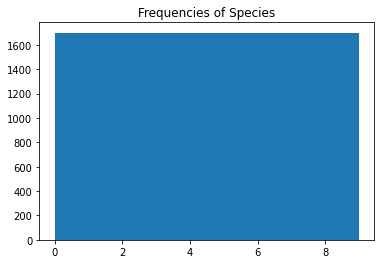

<Figure size 864x864 with 0 Axes>

In [19]:
# Plotting the histogram to make sure of the images in the model

plt.hist(train['DiseaseID'])
plt.title('Frequencies of Species')
plt.figure(figsize=(12, 12))
plt.show()

# Data Augmentation

In [ ]:
#This helps in increasing the data
datagen = ImageDataGenerator(rotation_range=360, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifting
                        height_shift_range=0.2, # Range for random vertical shifting
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flips input horizontally
                        vertical_flip=True) # Randomly flips input vertically

datagen.fit(X_train)

# Initializing the Dense Net Model

In [20]:
#Reshaping the images for the better model performance 
IMAGE_SIZE = 64
def read_image(filepath):
    return cv2.imread(os.path.join(TRAIN_DIR, filepath)) # Loading a colored image as a default flag

# Resizing the image to the target size which is given as 64
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [ ]:
#To find the shape of the Train Folder in the Dataset 
X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
        
# Normalization of the train data
X_Train = X_train / 255.
print('Train Shape: {}'.format(X_Train.shape))

17000it [00:19, 853.97it/s]


Train Shape: (17000, 64, 64, 3)


In [ ]:
# Printing the shape value of the class before and after adding the labels

Y_train = train['DiseaseID'].values
print('Before shape value:',Y_train.shape)

Y_train = to_categorical(Y_train, num_classes=10)
print('shape value after adding the classes:',Y_train.shape)

Before shape value: (17000,)
shape value after adding the classes: (17000, 10)


# Splitting the data for training and Testing purpose

In [ ]:
BATCH_SIZE = 128

# Split the train and validation sets 
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.2, random_state=SEED)

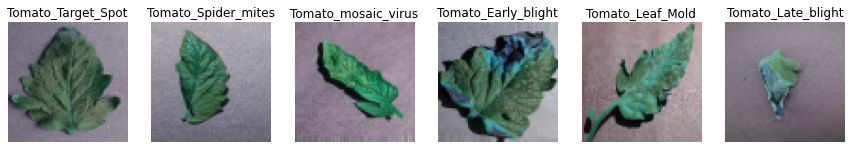

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(15, 15))
for i in range(6):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(disease_types[np.argmax(Y_train[i])])

In [ ]:
# Performing Model Using 50 Epochs

EPOCHS = 50
SIZE=64
N_ch=3

In [ ]:
# Performing the Dense Model using Transfer Learning by collecting the data from Image Net

def build_densenet():
    densenet = DenseNet121(weights='imagenet', include_top=False)
    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    #x = Maxpool2D(3, strides = 2, padding='same')(x)
    x = densenet(x)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multiple output
    output = Dense(10, activation = 'softmax', name='root')(x)
 
    # model
    model = Model(input,output)
    
    optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [ ]:
#Printing the model for identifying the DenseNet Parameters

model = build_densenet()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

29089792/29084464 [==============================] - 1s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 3)         84        
_________________________________________________________________
densenet121 (Functional)     (None, None, None, 1024)  7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_______________________________________________________

# Fitting the Model

In [ ]:
# Fits the model on batches with real-time data augmentation
#It took around 20 Min to complete all the 50 Epochs

hist = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint],
               validation_data=(X_val, Y_val))

Epoch 1/50

Epoch 00001: val_loss improved from inf to 1.69971, saving model to model.h5
106/106 - 17s - loss: 2.6268 - accuracy: 0.2583 - val_loss: 1.6997 - val_accuracy: 0.4124
Epoch 2/50

Epoch 00002: val_loss improved from 1.69971 to 0.94914, saving model to model.h5
106/106 - 15s - loss: 1.1571 - accuracy: 0.6242 - val_loss: 0.9491 - val_accuracy: 0.7056
Epoch 3/50

Epoch 00003: val_loss improved from 0.94914 to 0.58344, saving model to model.h5
106/106 - 15s - loss: 0.6452 - accuracy: 0.7883 - val_loss: 0.5834 - val_accuracy: 0.8235
Epoch 4/50

Epoch 00004: val_loss improved from 0.58344 to 0.50501, saving model to model.h5
106/106 - 15s - loss: 0.3965 - accuracy: 0.8690 - val_loss: 0.5050 - val_accuracy: 0.8318
Epoch 5/50

Epoch 00005: val_loss improved from 0.50501 to 0.27906, saving model to model.h5
106/106 - 15s - loss: 0.2550 - accuracy: 0.9196 - val_loss: 0.2791 - val_accuracy: 0.9085
Epoch 6/50

Epoch 00006: val_loss improved from 0.27906 to 0.20420, saving model to model

In [ ]:
#Calculating the Model Accuracy

final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

107/107 [==============================] - 2s 19ms/step - loss: 0.1323 - accuracy: 0.9718
Final Loss: 0.13229717314243317, Final Accuracy: 0.9717646837234497


#Model Accuary and Loss

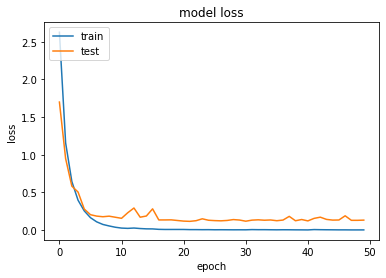

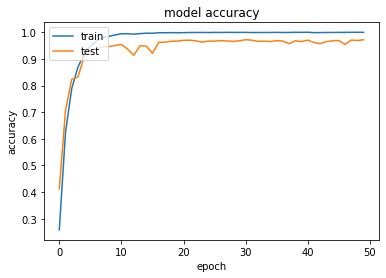

In [ ]:
# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
epochs= range(1,50)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
epochs= range(1,50)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/densenet.h5")

# Predicting the Tomato Leaf Disease

[0.01434271 0.06368044 0.17183821 0.22479928 0.0107968  0.09156863
 0.06051534 0.09269886 0.03004459 0.23971517]


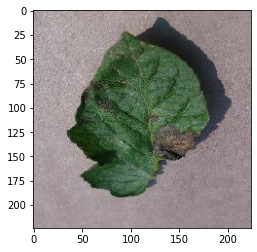

Prediction: Tomato_Early_blight


In [ ]:
from skimage import io
from keras.preprocessing import image

disease_types = ['Tomato_mosaic_virus',
                 'Tomato_Late_blight',
                 'Tomato_Septoria_leaf_spot',
                 'Tomato_Bacterial_spot',
                 'Tomato_Spider_mites',
                 'Tomato_Yellow_Leaf_Curl_Virus',
                 'Tomato_Leaf_Mold',
                 'Tomato_Target_Spot',
                 'Tomato_healthy',
                 'Tomato_Early_blight']

img = image.load_img('/content/Total/Tomato_Early_blight/Tomato_Early_blight (1086).JPG')
show_img=image.load_img('/content/Total/Tomato_Early_blight/Tomato_Early_blight (1086).JPG', grayscale=False, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
#x = np.array(x, 'float32')
x /= 255

disease = model.predict(x)
print(disease[0])

plt.imshow(show_img)
plt.show()

a=disease[0]
ind=np.argmax(a)
        
print('Prediction:',disease_types[ind])

#Plotting the Model

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.679574 to fit



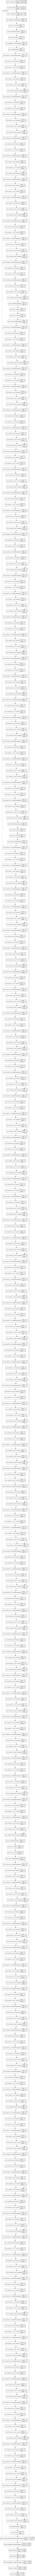

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB', expand_nested=True)

# Evaluation Matrics

Text(0.5, 144.41374999999996, 'Predicted')

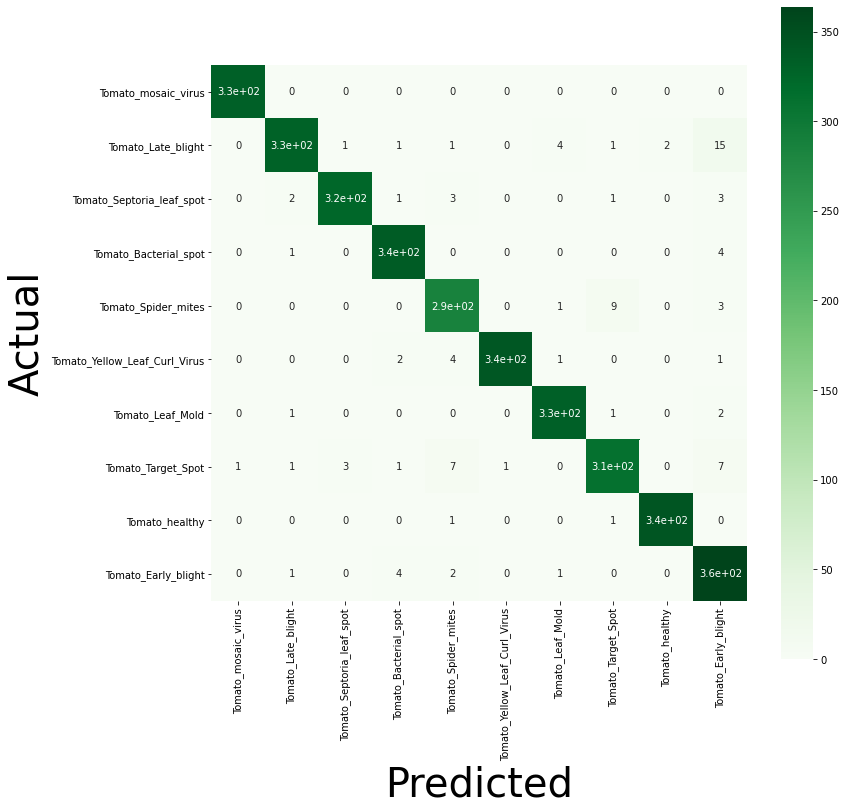

In [ ]:
# Confusion Matrix

Y_pred = model.predict(X_val)
Y_pred = np.argmax(Y_pred, axis=1)

Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)

ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics

print ("Accuracy : ", metrics.accuracy_score(Y_true, Y_pred)*100)

Accuracy :  97.1764705882353


In [ ]:
# Precision
from sklearn.metrics import precision_score

precision_score(Y_true, Y_pred, average=None)

array([0.996997  , 0.98214286, 0.98784195, 0.97391304, 0.94078947,
       0.99708455, 0.97935103, 0.96      , 0.99423631, 0.9122807 ])

In [ ]:
# Recall

from sklearn.metrics import recall_score
recall_score(Y_true, Y_pred, average=None)

array([1.        , 0.92957746, 0.97014925, 0.98533724, 0.95652174,
       0.97714286, 0.98809524, 0.93693694, 0.99423631, 0.97849462])

In [ ]:
# F1_score
from sklearn.metrics import f1_score

f1_score(Y_true, Y_pred, average=None)

array([0.99849624, 0.95513748, 0.97891566, 0.97959184, 0.94859038,
       0.98701299, 0.9837037 , 0.94832827, 0.99423631, 0.94422827])

In [ ]:
from sklearn.metrics import r2_score

r2_score(Y_true, Y_pred)

0.9188031002843797

In [ ]:
#MAE L1 loss function - Should be close to 0

from sklearn.metrics import mean_absolute_error  
mean_absolute_error(Y_true, Y_pred)

0.12205882352941176

In [ ]:
#MSE L2 loss function - Should be close to 0

from sklearn.metrics import mean_squared_error  
mean_squared_error(Y_true, Y_pred)

0.6855882352941176

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.98      0.93      0.96       355
           2       0.99      0.97      0.98       335
           3       0.97      0.99      0.98       341
           4       0.94      0.96      0.95       299
           5       1.00      0.98      0.99       350
           6       0.98      0.99      0.98       336
           7       0.96      0.94      0.95       333
           8       0.99      0.99      0.99       347
           9       0.91      0.98      0.94       372

    accuracy                           0.97      3400
   macro avg       0.97      0.97      0.97      3400
weighted avg       0.97      0.97      0.97      3400



# Thank You